#Name : Sahil Sudhir Utekar
#TASK 3
##Prediction Using Decision Tree Algorithm (Level - Intermediate)
For the given ‘Iris’ dataset, create the Decision Tree classifier with a purpose that if a new data is fed, it would predict the right class acoordingly. Also, visualize the Decision Tree graphically.
Loading the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn import datasets

Loading the dataset

In [32]:
iris=datasets.load_iris()
X=pd.DataFrame(iris.data,columns=iris.feature_names)
y=iris.target
y=pd.DataFrame(y)


DataSet Loaded Sucessfully.

```
# This is formatted as code
```



In [33]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


DataSet Loaded Sucessfully.

In [6]:
df=pd.concat([X,y],axis=1)


In [7]:
df.rename(columns={0:'Target'},inplace=True)


In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


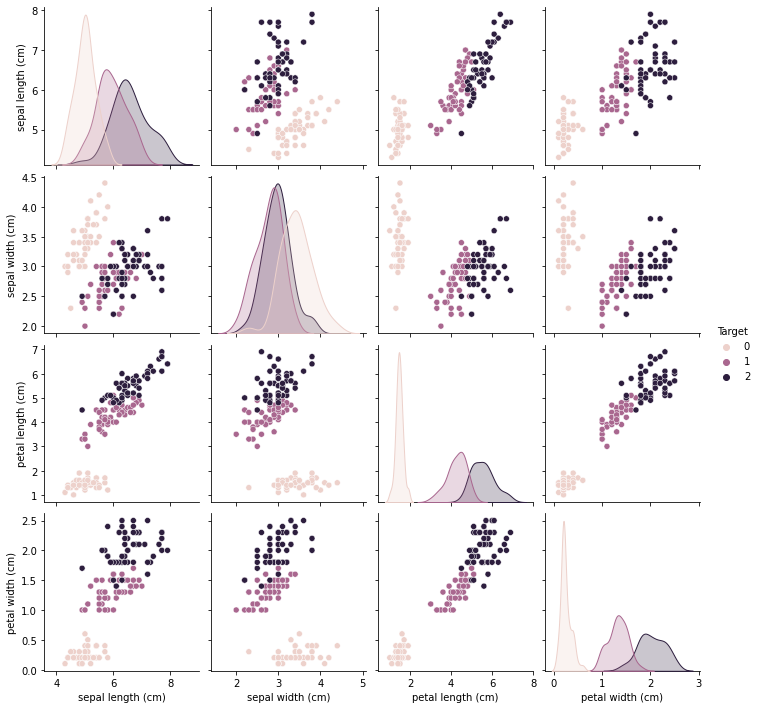

In [9]:
sns.pairplot(df,hue='Target')
plt.show()


#Spliting the dataset in test and train

In [10]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

##Standard Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [15]:
X_trains=ss.fit_transform(X_train)
X_tests=ss.transform(X_test)

##Fitting the dataset.

In [16]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [17]:
X_trains=ss.fit_transform(X_train)
X_tests=ss.transform(X_test)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dtc=DecisionTreeClassifier(random_state=0)


In [20]:
dtc.fit(X_trains,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [21]:
y_pred = dtc.predict(X_tests)


In [22]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [23]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [24]:
print(confusion_matrix(y_test,y_pred))


[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [25]:
print(accuracy_score(y_test,y_pred))


0.9777777777777777


In [26]:
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [27]:
dtc.fit(X,y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [28]:
import sklearn
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [30]:
dtc.fit(X, y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

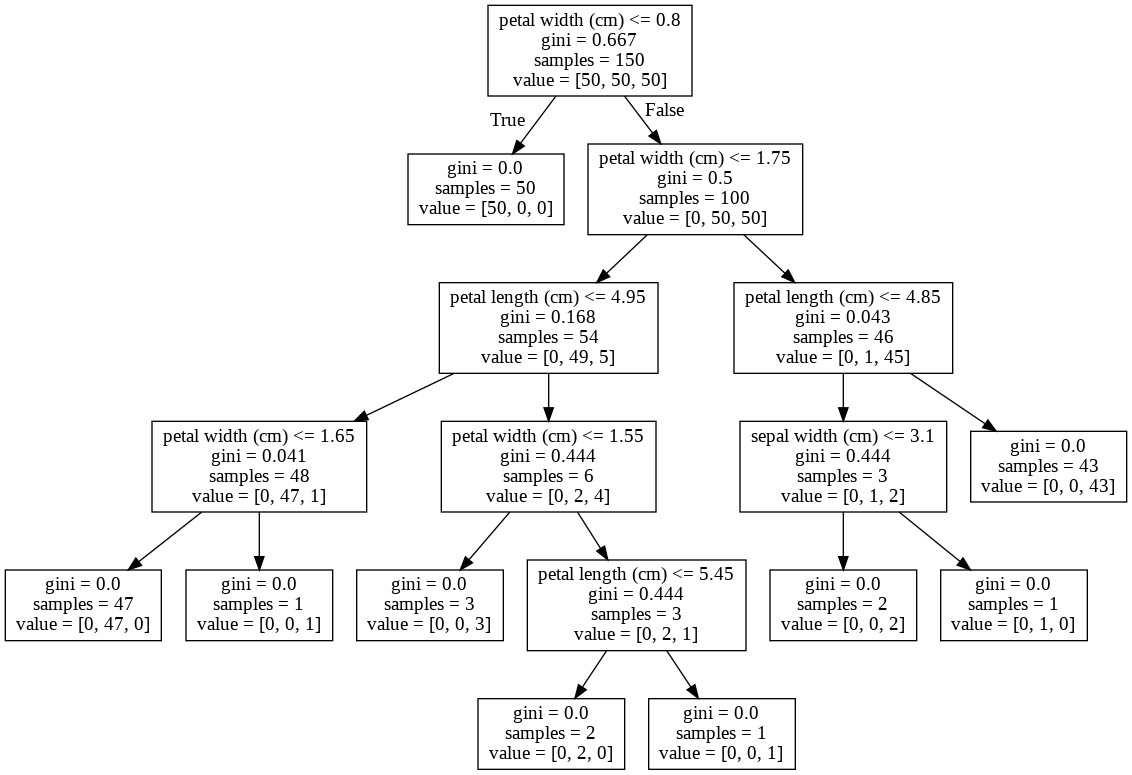

In [31]:
features = X.columns
# Create DOT data
dot_data = export_graphviz(dtc, out_file=None, feature_names=features)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data) 
# Show graph
Image(graph.create_png())